<a href="https://colab.research.google.com/github/BrainstormerAI/Use-Cases-of-Stable-Diffusion/blob/main/AI%20QR%20Generation/AI_QR_Generation_using_controlnet_of_Stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diffusers, transformers, accelerate, torch, xformers: These are the package names that will be installed in the current Python environment.

When you run this command in your terminal or command prompt, it will install the specified packages (diffusers, transformers, accelerate, torch, and xformers) with minimal output, and they will be available for use in your Python projects afterward. Note that torch refers to PyTorch, a popular deep learning framework for Python, and transformers is the Hugging Face Transformers library, which provides state-of-the-art natural language processing models and utilities. The other packages (diffusers, accelerate, and xformers) might be specific to the project you are working on or are utility libraries.

In [ ]:
pip -q install diffusers transformers accelerate torch xformers

*   **import** torch: This imports the PyTorch library, which is a popular deep learning framework used for building and training neural networks. PyTorch provides various functionalities for tensor operations and automatic differentiation, making it well-suited for machine learning and deep learning tasks.
*   **PIL import Image** : This imports the Image module from the Python Imaging Library (PIL). PIL is a library used for opening, manipulating, and saving image files in various formats.

*   **from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler :** These imports are from the diffusers library. diffusers appears to be a library related to diffusion models and image-to-image pipelines. The specific classes being imported suggest that the library is designed for controlling diffusion processes in image-to-image tasks using control nets.
*   from diffusers.utils import load_image: This imports the load_image function from the utils module of the diffusers library. This function might be used to load image data into the pipeline for processing.





In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image



*   **ControlNetModel:** This is likely a custom class or model specific to your project, which is used for controlling QR codes. It might be part of a larger framework or library related to QR code manipulation or computer vision.

*   **DionTimmer/controlnet_qrcode-control_v1p_sd15**": This is the identifier of the pre-trained model you want to load. It points to a specific model hosted on the Hugging Face model hub or another repository. The model might have been trained by someone named DionTimmer for controlling QR codes.

In summary, the code loads a pre-trained ControlNetModel for controlling QR codes from the specified source, and it sets the data type for the model's parameters to float16 for potential performance improvements. After running this code, you'll have a fully initialized and ready-to-use model that can be employed for controlling QR codes as per the capabilities of the ControlNetModel.




In [ ]:
controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v1p_sd15",
                                             torch_dtype=torch.float16)

### The code is used to create an instance of the StableDiffusionControlNetImg2ImgPipeline class from the Hugging Face's Transformers library. This class is designed for image-to-image translation tasks using the Stable Diffusion models provided by RunwayML.



*   StableDiffusionControlNetImg2ImgPipeline: This is a class provided by Hugging Face's Transformers library. It represents an image-to-image translation pipeline that uses Stable Diffusion models.

*   from_pretrained: This is a static method of the StableDiffusionControlNetImg2ImgPipeline class, which is used to create an instance of the pipeline from a pre-trained model hosted on the Hugging Face model hub.

*   "runwayml/stable-diffusion-v1-5": This is the name of the pre-trained model that the pipeline will load. It corresponds to a Stable Diffusion model version 1.5 provided by RunwayML. The from_pretrained method will download and load the weights of this pre-trained model.

*   controlnet: This is a variable that should contain a control network (an input image or tensor) that guides the image-to-image translation process. The control network can be used to control or influence the output of the translation. Depending on the model and task, this can be optional or required.

*   safety_checker=None: This is an argument that specifies a safety checker for the pipeline. It is optional and can be used to enforce certain safety constraints during the image-to-image translation process. In this case, it is set to None, indicating that no safety checker is provided.

*   torch_dtype=torch.float16: This argument sets the torch data type (data precision) to torch.float16, which is 16-bit floating-point precision. This can be used to reduce memory consumption and speed up computations, especially on hardware that supports faster processing of half-precision data.

Once this line of code is executed, you will have a pipe object, which is an instance of the StableDiffusionControlNetImg2ImgPipeline class. This object can then be used to perform image-to-image translation tasks using the Stable Diffusion model with the specified control network and torch data type.







In [ ]:
pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


### It appears to be related to using the XFormers library, which is a framework for efficient transformers in PyTorch.

*   **pipe.enable_xformers_memory_efficient_attention()**: This line enables memory-efficient attention mechanisms provided by XFormers. Attention mechanisms are a fundamental part of transformer architectures, and they can be computationally expensive, especially for large models or input sequences. XFormers likely provides optimizations or alternative implementations of attention mechanisms to reduce memory consumption during training or inference.

*   **pipe.scheduler** = **DDIMScheduler.from_config(pipe.scheduler.config)**: This line sets the scheduler for the pipe object. The **DDIMScheduler** is likely a specific scheduler provided by XFormers. In deep learning, schedulers are used to adjust hyperparameters, such as learning rates, during the training process.

*   **pipe.enable_model_cpu_offload()**: This line enables CPU offloading for the model used in the pipe object. CPU offloading refers to the process of moving some computations from the GPU (or main processing unit) to the CPU. This can be useful when working with large models or input data that may not fit entirely in GPU memory.







In [ ]:
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

The provided Python function resize_for_condition_image takes an input image and resizes it while maintaining the aspect ratio to fit a specified resolution. The purpose of this function is likely related to preparing an image for further processing or usage in a particular context that requires a specific resolution.


In [ ]:
def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img

## Play with guidance_scale, controlnet_conditioning_scale and strength to make a valid QR Code Image.
### **condition_image** = resize_for_condition_image(source_image, 768): This line resizes the source_image to have a resolution of 768 pixels on the longer side. The function resize_for_condition_image is likely a custom function that was defined earlier to resize the image while maintaining its aspect ratio.
### **generator** = torch.manual_seed(123121231): This sets the random seed for the Torch generator to ensure reproducibility. The provided seed value is 123121231.
### **init_image** = resize_for_condition_image(init_image, 768): Similar to the previous line, this line resizes the init_image to have a resolution of 768 pixels on the longer side.

### The function pipe is being called with the following arguments:

*   **prompt:** A textual prompt that describes the desired image. It likely contains creative cues, specifications, or inspiration for the generated image.

*   **negative_prompt:** A textual prompt that describes the undesired aspects of the image. This might help guide the generative process away from certain undesired characteristics.

*  ** image:** The resized initial image, which serves as a starting point for the generative process.

*   **control_image:** The resized condition image that influences the generation process. The purpose of this image is to condition the generative model to produce an image that aligns with the provided condition.

*   **guidance_scale:** A parameter that controls the influence of the textual prompt on the final image.

*   **controlnet_conditioning_scale:** A parameter that controls the influence of the control_image on the final image.

*   **generator:** The Torch generator used for random number generation.

*   **strength:** A parameter that controls the strength of the conditioning effect from the control_image.

*   num_inference_steps: The number of inference steps or iterations for the generative algorithm.

The pipe function likely uses deep learning models, such as GANs (Generative Adversarial Networks) or VQ-VAE-2 (Vector Quantized Variational AutoEncoder 2), to generate the final image based on the provided prompts and conditioning images.












In [ ]:
#

# qr code image
source_image = load_image("/content/download_qr (3).png")
# initial image, anything
init_image = load_image("https://s3.amazonaws.com/moonup/production/uploads/noauth/KfMBABpOwIuNolv1pe3qX.jpeg")
condition_image = resize_for_condition_image(source_image, 768)
init_image = resize_for_condition_image(init_image, 768)
generator = torch.manual_seed(123121231)
image = pipe(prompt="A photo-realistic rendering of a busy market, ((street vendors, fruits, vegetable, shops)), (Photorealistic:1.3), (Highly detailed:1.2), (Natural light:1.2), art inspired by Architectural Digest, Vogue Living, and Elle Decor",
             negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
             image=init_image,
             control_image=condition_image,
             width=768,
             height=768,
             guidance_scale=20,
             controlnet_conditioning_scale=3.5,
             generator=generator,
             strength=0.9,
             num_inference_steps=150,
            )


  0%|          | 0/135 [00:00<?, ?it/s]

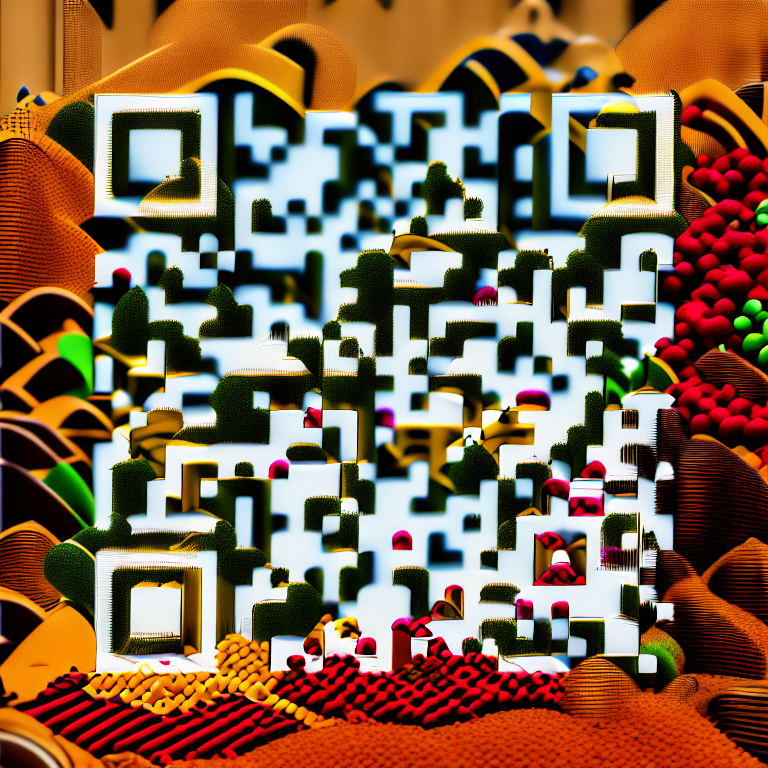

In [ ]:
image.images[0]

  0%|          | 0/135 [00:00<?, ?it/s]

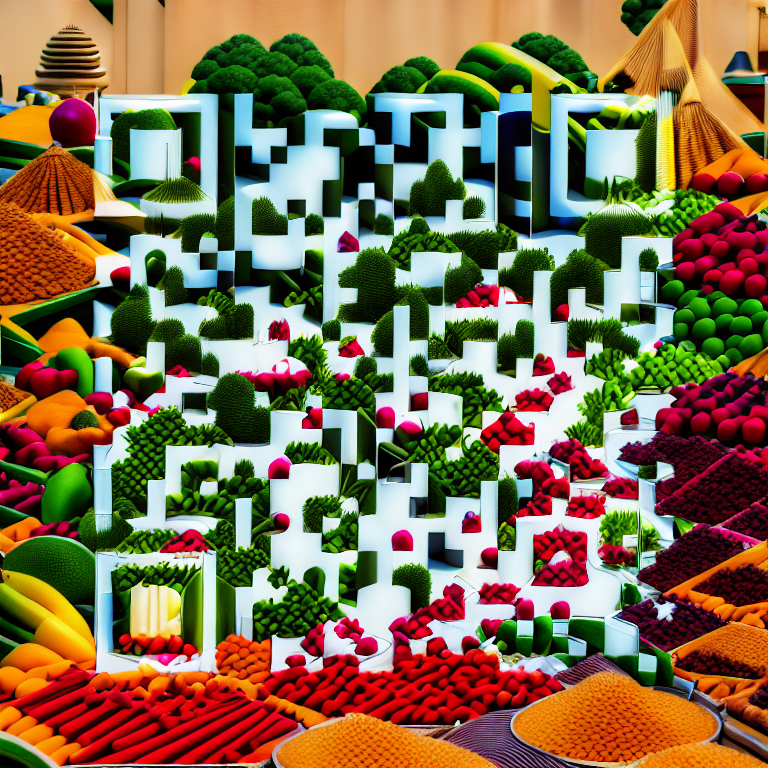

In [ ]:
# play with guidance_scale, controlnet_conditioning_scale and strength to make a valid QR Code Image

# qr code image
source_image = load_image("/content/download_qr (3).png")
# initial image, anything
init_image = load_image("https://s3.amazonaws.com/moonup/production/uploads/noauth/KfMBABpOwIuNolv1pe3qX.jpeg")
condition_image = resize_for_condition_image(source_image, 768)
init_image = resize_for_condition_image(init_image, 768)
generator = torch.manual_seed(123121231)
image = pipe(prompt="A photo-realistic rendering of a busy market, ((street vendors, fruits, vegetable, shops)), (Photorealistic:1.3), (Highly detailed:1.2), (Natural light:1.2), art inspired by Architectural Digest, Vogue Living, and Elle Decor",
             negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
             image=init_image,
             control_image=condition_image,
             width=768,
             height=768,
             guidance_scale=20,
             controlnet_conditioning_scale=2.5,
             generator=generator,
             strength=0.9,
             num_inference_steps=150,
            )
image.images[0]

  0%|          | 0/120 [00:00<?, ?it/s]

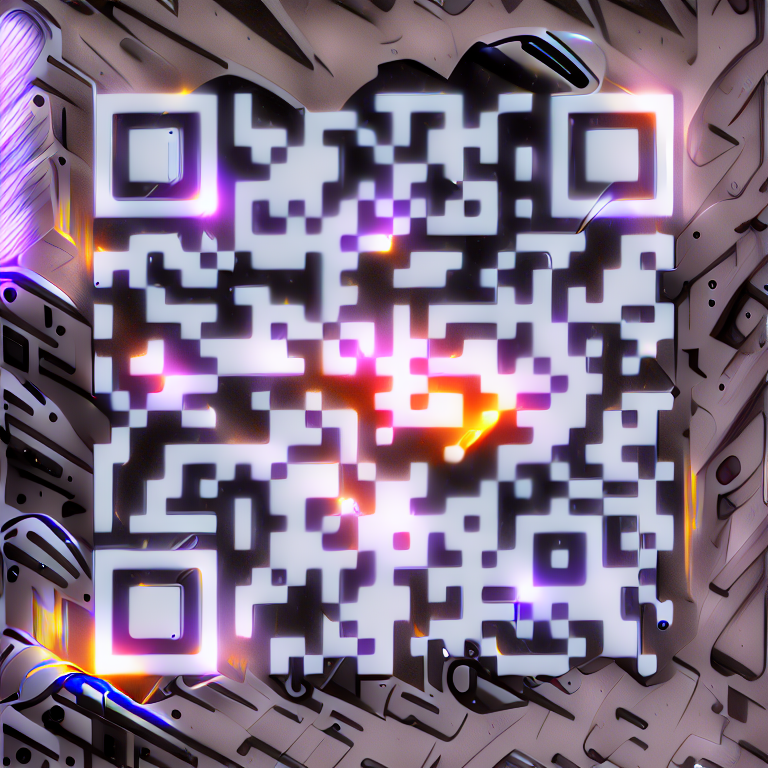

In [ ]:
# play with guidance_scale, controlnet_conditioning_scale and strength to make a valid QR Code Image

# qr code image
source_image = load_image("/content/download_qr (3).png")
# initial image, anything
init_image = load_image("https://s3.amazonaws.com/moonup/production/uploads/noauth/KfMBABpOwIuNolv1pe3qX.jpeg")
condition_image = resize_for_condition_image(source_image, 768)
init_image = resize_for_condition_image(init_image, 768)
generator = torch.manual_seed(123121231)
image = pipe(prompt="light, futobot, cyborg, ((masterpiece),(best quality),(ultra-detailed), (full body:1.2), 1male, solo, hood up, upper body, mask, 1boy, male focus,white gloves, cloak, long sleeves, spaceship, lightning, hire",
             negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
             image=init_image,
             control_image=condition_image,
             width=768,
             height=768,
             guidance_scale=20,
             controlnet_conditioning_scale=4.5,
             generator=generator,
             strength=0.8,
             num_inference_steps=150,
            )
image.images[0]